In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [ ]:
%pip install transformers[torch] accelerate -U datasets seaborn

# Data Processing


In [4]:
from __future__ import division, print_function, absolute_import
print('Importing libraries...')
import pickle
#import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image
from skimage import transform #For downsizing images
from sklearn.model_selection import train_test_split

Importing libraries...


In [5]:
# Creating features dataset
# unpickling the image files
with open ('/content/drive/MyDrive/population density satellite data/dataX', 'rb') as fp:
    dataX = pickle.load(fp)
print('Features dataset finished with shape', dataX.shape)


Features dataset finished with shape (7000, 200, 200, 3)


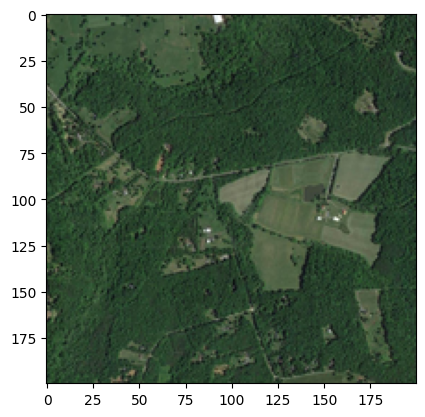

In [6]:
# Plot a sample image from dataset
import cv2
import matplotlib.pyplot as plt
temp = cv2.cvtColor(dataX[0], cv2.COLOR_BGR2RGB)
plt.imshow(temp)
#plt.imshow(imageio.imread('./images/0_0.png'))
plt.show()

In [7]:
# unpickling labels file
with open ('/content/drive/MyDrive/population density satellite data/dataY', 'rb') as fp:
    dataY = pickle.load(fp)
print('Labels dataset finished with shape', dataY.shape)

Labels dataset finished with shape (7000,)


In [8]:
# check the label format
print(dataY[465])

2604.789675


In [9]:
# Convert the images to PIL format to make it compatible for datasets library format
from PIL import Image
import numpy as np

images_as_pil = []

# Convert each NumPy array to a PIL image
for img_data in dataX:
    # Convert the numpy array to a PIL Image
    img_pil = Image.fromarray(img_data.astype('uint8'))
    images_as_pil.append(img_pil)


In [10]:
# Function to assign labels based on true values of labels
def classify(n):
  if (n<1):
      n = 0

  if (1<=n) and (n<10):
      n = 1

  if (10<=n) and (n<50):
      n = 2

  if (50<=n) and (n<100):
      n = 3

  if (100<=n) and (n<500):
      n = 4

  if (500<=n) and (n<1000):
          n = 5

  if (1000<=n) and (n<2000):
      n = 6

  if (2000<=n):
      n = 7
  return n


In [11]:
# Convert the label type as integer
labels = dataY.tolist()
labels = [int(classify(x)) for x in labels]

In [12]:
print(labels)

[2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 3, 3, 4, 3, 3, 4, 5, 6, 6, 6, 6, 4, 5, 6, 5, 3, 1, 1, 1, 2, 3, 3, 1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 4, 4, 4, 2, 1, 0, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 4, 4, 4, 4, 5, 6, 6, 6, 5, 4, 4, 6, 5, 4, 2, 2, 2, 2, 2, 1, 1, 2, 2, 4, 2, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 3, 3, 2, 4, 4, 4, 4, 5, 5, 6, 6, 5, 5, 5, 6, 4, 3, 3, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 3, 4, 4, 4, 2, 2, 1, 1, 2, 4, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 5, 4, 0, 4, 5, 2, 0, 1, 4, 4, 3, 2, 1, 2, 2, 2, 2, 3, 4, 4, 2, 2, 3, 3, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 5, 5, 3, 3, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 6, 6, 6, 4, 3, 4, 5, 4, 4, 3, 4, 1, 2, 4, 5, 4, 

In [13]:
# Create Data Dictionary for Huggingface dataset
huggingface_dataset = {
    'image': images_as_pil,
    'labels': labels
}

In [14]:
# prepare the final dataset
from datasets import Dataset
dataset = Dataset.from_dict(huggingface_dataset)

In [15]:
dataset

Dataset({
    features: ['image', 'labels'],
    num_rows: 7000
})

In [16]:
dataset[0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=200x200>,
 'labels': 2}

##Train Or Test

while training download the default model from huggingface by:-
```model_name_or_path = 'google/vit-base-patch16-224-in21k'```

For inferencing the trained model on test data, use the below model path.
```model_name_or_path = Path to your checkpoint storage ex- .../checkpoint-2000```

In [18]:
from transformers import ViTImageProcessor

model_name_or_path = '/content/drive/MyDrive/population density satellite data/ViT/final_result/checkpoint-2000'
processor = ViTImageProcessor.from_pretrained(model_name_or_path)


In [19]:
# split the dataset
dataset = dataset.train_test_split(test_size=0.2)

In [20]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'labels'],
        num_rows: 5600
    })
    test: Dataset({
        features: ['image', 'labels'],
        num_rows: 1400
    })
})

In [21]:
dataset['train'][0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=200x200>,
 'labels': 6}

In [22]:
def process_example(example):
    inputs = processor(example['image'], return_tensors='pt')
    inputs['label'] = example['label']
    return inputs

In [23]:
def transform(example_batch):
    # Take a list of PIL images and turn them to pixel values
    inputs = processor([x for x in example_batch['image']], return_tensors='pt')

    # Don't forget to include the labels!
    inputs['labels'] = example_batch['labels']
    return inputs

In [24]:
# Transform the dataset for model compatibility
prepared_dataset = dataset.with_transform(transform)

In [25]:

prepared_dataset['train'][0]['pixel_values'].shape

torch.Size([3, 224, 224])

In [26]:
prepared_dataset['train'][0:2]

{'pixel_values': tensor([[[[-0.4039, -0.4275, -0.4902,  ..., -0.7882, -0.7098, -0.7569],
          [-0.5137, -0.5922, -0.4902,  ..., -0.6784, -0.6863, -0.7412],
          [-0.6157, -0.5216, -0.4196,  ..., -0.6784, -0.7255, -0.8431],
          ...,
          [-0.5843, -0.5451, -0.7020,  ..., -0.6706, -0.6941, -0.6784],
          [-0.4745, -0.4745, -0.6314,  ..., -0.6863, -0.7333, -0.7176],
          [-0.3333, -0.4980, -0.4510,  ..., -0.7255, -0.7333, -0.6314]],

         [[-0.3333, -0.3176, -0.4039,  ..., -0.6706, -0.5843, -0.6078],
          [-0.4353, -0.4902, -0.4353,  ..., -0.5373, -0.5608, -0.6314],
          [-0.5373, -0.4353, -0.4039,  ..., -0.5137, -0.6157, -0.7725],
          ...,
          [-0.4902, -0.5137, -0.6706,  ..., -0.5608, -0.5686, -0.5451],
          [-0.3412, -0.4039, -0.5686,  ..., -0.5686, -0.6235, -0.6157],
          [-0.1608, -0.3882, -0.3490,  ..., -0.6000, -0.6392, -0.5686]],

         [[-0.3804, -0.3569, -0.4275,  ..., -0.7647, -0.6941, -0.7490],
          [-0

In [27]:
import torch

def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['labels'] for x in batch])
    }

In [28]:
import numpy as np
from datasets import load_metric
from sklearn.metrics import confusion_matrix

metric = load_metric("accuracy")

def compute_metrics(p):
    predictions = np.argmax(p.predictions, axis=1)
    references = p.label_ids

    # Compute the confusion matrix
    cm = confusion_matrix(references, predictions)

    # Compute accuracy using the loaded accuracy metric
    accuracy = metric.compute(predictions=predictions, references=references)

    # Add the confusion matrix to the metric dictionary
    metric_dict = {"accuracy": accuracy, "confusion_matrix": cm.tolist()}

    return metric_dict


<ipython-input-28-2b308f8fa624>:5: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


In [29]:
id2label = {
    0:0,
    1:1,
    2:2,
    3:3,
    4:4,
    5:5,
    6:6,
    7:7

}
label2id = {
    0:0,
    1:1,
    2:2,
    3:3,
    4:4,
    5:5,
    6:6,
    7:7

}

In [30]:
from transformers import ViTForImageClassification



model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=8,
    id2label=id2label,
    label2id=label2id
)


In [31]:
%cd /content/drive/MyDrive/population density satellite data/ViT

/content/drive/MyDrive/population density satellite data/ViT


In [32]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="final_result",
  per_device_train_batch_size=16,
  evaluation_strategy="epoch",
  num_train_epochs=7,
  fp16=True,
  # save_steps=100,
  # eval_steps=100,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=1,
  remove_unused_columns=False,
  push_to_hub=False,
)


In [33]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_dataset["train"],
    eval_dataset=prepared_dataset["test"],
    tokenizer=processor,
)

## Only run the below command when training model


In [ ]:
train_results = trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.838400,0.843515,0.671429
2,0.743600,0.731443,0.682857
3,0.490300,0.816466,0.688571
4,0.259100,1.121684,0.672857
5,0.106700,1.196079,0.682857


## Model Evaluation


### Evaluation on train dataset

In [34]:
metrics = trainer.evaluate(prepared_dataset['train'])

Trainer is attempting to log a value of "{'accuracy': 0.9358928571428572}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "[[117, 9, 1, 0, 0, 0, 0, 0], [8, 558, 52, 1, 0, 0, 0, 0], [1, 25, 2176, 61, 2, 0, 0, 0], [0, 1, 27, 699, 9, 0, 0, 0], [0, 0, 6, 51, 958, 22, 1, 0], [0, 0, 0, 0, 15, 392, 13, 0], [0, 0, 0, 0, 1, 30, 265, 9], [0, 0, 0, 0, 0, 3, 11, 76]]" of type <class 'list'> for key "eval/confusion_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


In [35]:
metrics

{'eval_loss': 0.27952367067337036,
 'eval_accuracy': {'accuracy': 0.9358928571428572},
 'eval_confusion_matrix': [[117, 9, 1, 0, 0, 0, 0, 0],
  [8, 558, 52, 1, 0, 0, 0, 0],
  [1, 25, 2176, 61, 2, 0, 0, 0],
  [0, 1, 27, 699, 9, 0, 0, 0],
  [0, 0, 6, 51, 958, 22, 1, 0],
  [0, 0, 0, 0, 15, 392, 13, 0],
  [0, 0, 0, 0, 1, 30, 265, 9],
  [0, 0, 0, 0, 0, 3, 11, 76]],
 'eval_runtime': 100.9599,
 'eval_samples_per_second': 55.468,
 'eval_steps_per_second': 6.933}

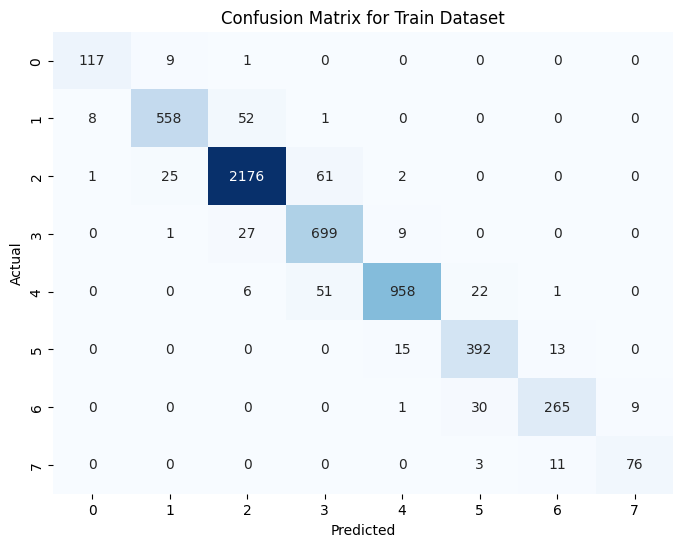

In [36]:
# plot the confusion matrix
# Convert to NumPy array
import seaborn as sns
confusion_matrix_array_test = np.array(metrics['eval_confusion_matrix'])

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_array_test, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Train Dataset")
plt.show()

### Evaluation Test Dataset

In [37]:
metrics_test = trainer.evaluate(prepared_dataset['test'])

Trainer is attempting to log a value of "{'accuracy': 0.9271428571428572}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "[[42, 0, 0, 0, 0, 0, 0, 0], [4, 145, 11, 1, 1, 0, 0, 0], [1, 7, 507, 22, 0, 0, 0, 0], [0, 0, 13, 156, 2, 0, 0, 0], [1, 0, 0, 13, 236, 4, 0, 0], [0, 0, 0, 0, 3, 101, 5, 0], [0, 0, 0, 0, 0, 11, 85, 0], [0, 0, 0, 0, 0, 0, 3, 26]]" of type <class 'list'> for key "eval/confusion_matrix" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.


In [38]:
metrics_test

{'eval_loss': 0.3103799521923065,
 'eval_accuracy': {'accuracy': 0.9271428571428572},
 'eval_confusion_matrix': [[42, 0, 0, 0, 0, 0, 0, 0],
  [4, 145, 11, 1, 1, 0, 0, 0],
  [1, 7, 507, 22, 0, 0, 0, 0],
  [0, 0, 13, 156, 2, 0, 0, 0],
  [1, 0, 0, 13, 236, 4, 0, 0],
  [0, 0, 0, 0, 3, 101, 5, 0],
  [0, 0, 0, 0, 0, 11, 85, 0],
  [0, 0, 0, 0, 0, 0, 3, 26]],
 'eval_runtime': 37.3051,
 'eval_samples_per_second': 37.528,
 'eval_steps_per_second': 4.691}

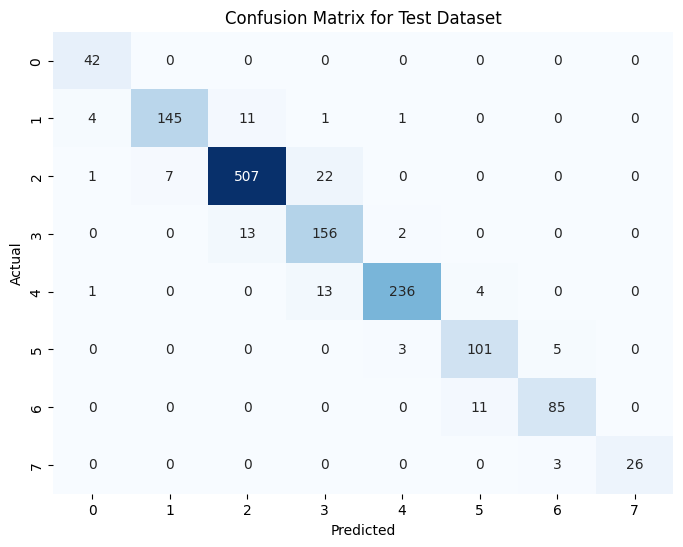

In [39]:
# plot the confusion matrix
# Convert to NumPy array
import seaborn as sns
confusion_matrix_array_test = np.array(metrics_test['eval_confusion_matrix'])

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_array_test, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Test Dataset")
plt.show()